In [1]:
import os
from torchvision import transforms as T
from torch.utils.data import DataLoader,Dataset
import matplotlib.pyplot as plt
import torch
from torchvision import utils
from PIL import Image
import pandas as pd
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm

D:\Anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] 找不到指定的程序。
  warn(f"Failed to load image Python extension: {e}")


In [2]:
class MyDataset(Dataset): 
    def __init__(self, root, transforms=None, train=True):
        imgs = [os.path.join(root, img) for img in os.listdir(root)]
        imgs = sorted(imgs, key=lambda x: int(x.split('.')[-2].split('_')[-1]))
        imgs_num = len(imgs)
        if train:
            self.imgs = imgs[:int(0.9 * imgs_num)]
        else:
            self.imgs = imgs[int(0.9 * imgs_num):]
    
        if transforms is None:
 
            if not train:
                self.transforms = T.Compose([
                    T.Resize(200), 
                    T.CenterCrop(200), 
                    T.ToTensor(),
                    T.Normalize([0.502],[0.211])
                ])
            else:
                self.transforms = T.Compose([
                    T.Resize(200), 
                    T.CenterCrop(200), 
                    T.RandomHorizontalFlip(),
                    T.ToTensor(),
                    T.Normalize([0.502],[0.211])
                ])

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self,index):
        img_path = self.imgs[index]
        label_dict = {'Cr':0,'In':1,'Pa':2,'PS':3,'RS':4,'Sc':5}
        label = self.imgs[index].split('_')[-2].split('\\')[-1]
        label = label_dict[label]
        
        data = Image.open(img_path)
        data = self.transforms(data)
        return data, label

In [3]:
train_data = MyDataset("C:\\Users\\35199\\Desktop\\Gantie\\data",train=True)
test_data = MyDataset("C:\\Users\\35199\\Desktop\\Gantie\\data",train=False)
batch_size = 64  

In [5]:
type(train_data)

__main__.MyDataset

In [7]:
train_dataloader = DataLoader(train_data,batch_size=batch_size,shuffle=True)
for batch_datas, batch_labels in train_dataloader:
    print(batch_datas.size(),batch_labels.size())
    break

torch.Size([64, 1, 200, 200]) torch.Size([64])


In [8]:
test_dataloader = DataLoader(test_data,batch_size=batch_size,shuffle=True)
for batch_datas, batch_labels in test_dataloader:
    print(batch_datas.size(),batch_labels.size())
    break

torch.Size([64, 1, 200, 200]) torch.Size([64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


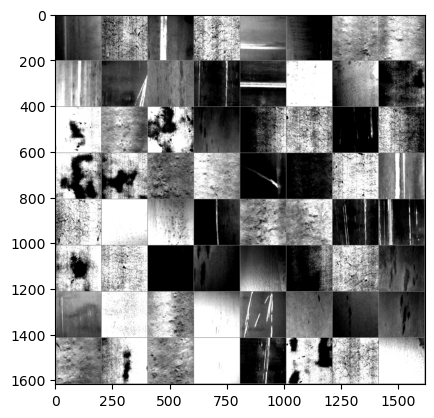

tensor([5, 0, 5, 0, 5, 5, 4, 4, 5, 5, 1, 5, 5, 3, 3, 2, 2, 4, 2, 1, 0, 0, 5, 0,
        2, 2, 4, 4, 5, 4, 0, 5, 0, 3, 3, 5, 4, 4, 5, 5, 2, 0, 1, 1, 3, 2, 0, 1,
        5, 3, 4, 1, 5, 1, 1, 1, 4, 2, 4, 1, 5, 2, 0, 3])

In [6]:
import torchvision
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
def imshow(img):
 img = img / 2 + 0.5  # unnormalize
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
dataiter = iter(train_dataloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


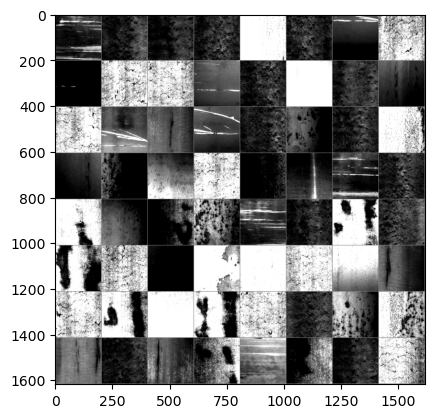

tensor([5, 4, 4, 4, 3, 4, 5, 0, 5, 0, 0, 5, 4, 1, 4, 1, 0, 5, 1, 5, 4, 3, 4, 3,
        1, 3, 3, 0, 2, 5, 5, 4, 2, 3, 2, 3, 5, 4, 2, 4, 2, 0, 1, 3, 3, 0, 3, 1,
        0, 2, 3, 2, 0, 4, 3, 3, 1, 4, 1, 2, 5, 2, 4, 0])

In [7]:
import torchvision
%matplotlib inline
def imshow(img):
 img = img / 2 + 0.5 
 npimg = img.numpy()
 plt.imshow(np.transpose(npimg, (1, 2, 0)))
 plt.show()
dataiter = iter(test_dataloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
labels

In [9]:
train_data.imgs

['C:\\Users\\35199\\Desktop\\Gantie\\data\\Cr_1.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\In_1.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\Pa_1.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\PS_1.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\RS_1.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\Sc_1.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\Cr_2.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\In_2.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\Pa_2.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\PS_2.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\RS_2.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\Sc_2.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\Cr_3.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\In_3.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\Pa_3.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\PS_3.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\RS_3.bmp',
 'C:\\Users\\35199\\Desktop\\Gantie\\data\\Sc_3.bmp',
 'C:\\Users\\35199\\Desktop\

In [8]:
len(train_data.imgs)

1620

In [9]:
len(test_data.imgs)

180

In [10]:
for img, label in train_data: 
 print("图像img的形状{},标签label的值{}".format(img.shape, label))
 print("图像数据预处理后：\n",img)
 break

图像img的形状torch.Size([1, 200, 200]),标签label的值0
图像数据预处理后：
 tensor([[[-7.9937e-01, -7.2503e-01, -4.4624e-01,  ...,  8.3617e-01,
           8.7334e-01,  1.0778e+00],
         [-4.0907e-01, -6.8785e-01, -6.6927e-01,  ...,  1.2451e+00,
           8.1758e-01,  7.4324e-01],
         [-2.7897e-01, -2.0463e-01, -7.8078e-01,  ...,  1.3752e+00,
           1.6725e+00,  1.2079e+00],
         ...,
         [-5.5943e-02,  1.6709e-01,  6.3173e-01,  ...,  1.2451e+00,
           1.5982e+00,  2.3602e+00],
         [ 3.6986e-02,  9.2743e-02,  6.5031e-01,  ...,  1.9513e+00,
           1.8770e+00,  2.3602e+00],
         [ 1.2991e-01, -1.8559e-04,  1.1133e-01,  ...,  1.4495e+00,
           1.4123e+00,  1.7654e+00]]])


In [11]:
class cnn(torch.nn.Module):
    def __init__(self):
        super(cnn, self).__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
 
            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),
            
            torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2),

            torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),

            torch.nn.Flatten(),
            torch.nn.Linear(in_features=25 * 25 * 256, out_features=512),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.2),  
            torch.nn.Linear(in_features=512, out_features=6),
        )
 
    def forward(self, input):
        output = self.model(input)
        return output

In [14]:
model

cnn(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): Flatten(start_dim=1, end_dim=-1)
    (12): Linear(in_features=160000, out_features=512, bias=True)
    (13): ReLU()
    (14): Dropout(p=0.2, inplace=False)
    (15): Linear(in_features=512, out_features=6, bias=True)
  )
)

In [13]:
model = cnn()
if torch.cuda.is_available():
    model = model.cpu()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
record = {'Train Loss': [],'Test Loss': [], 'Train Acc': [], 'Test Acc': []}

for epoch in range(1, epochs+1):
    process = tqdm(train_dataloader, unit='step')
    model.train(True)
    train_loss, train_correct = 0, 0
    for step, (train_imgs, labels) in enumerate(process):
 
        if torch.cuda.is_available():  
            train_imgs = train_imgs.cuda()
            labels = labels.cuda()
        model.zero_grad()  
        outputs = model(train_imgs)  
        loss = criterion(outputs, labels) 
        predictions = torch.argmax(outputs, dim=1)  
        correct = torch.sum(predictions == labels)
        accuracy = correct / labels.shape[0]  
        loss.backward()  
        optimizer.step() 
        process.set_description("[%d/%d] Loss: %.4f, Acc: %.4f" %  
                                   (epoch, epochs, loss.item(), accuracy.item()))
 
        train_loss = train_loss + loss
        train_correct = train_correct + correct
 
        if step == len(process) - 1:
            tst_correct, totalLoss = 0, 0
            model.train(False) 
            model.eval() 
            with torch.no_grad():
                for test_imgs, test_labels in test_dataloader:
                    if torch.cuda.is_available():
                        test_imgs = test_imgs.cpu()
                        test_labels = test_labels.cpu()
                    tst_outputs = model(test_imgs)
                    tst_loss = criterion(tst_outputs, test_labels)
                    predictions = torch.argmax(tst_outputs, dim=1)
 
                    totalLoss += tst_loss
                    tst_correct += torch.sum(predictions == test_labels)

                train_accuracy = train_correct / len(train_data.imgs)
                train_loss = train_loss / len(train_data.imgs)

                test_accuracy = tst_correct / len(test_data.imgs) 
                test_loss = totalLoss / len(test_data.imgs)
 
                record['Train Loss'].append(train_loss.item()) 
                record['Train Acc'].append(train_accuracy.item())
                record['Test Loss'].append(test_loss.item())
                record['Test Acc'].append(test_accuracy.item())
 
                process.set_description("[%d/%d] Loss: %.4f, Acc: %.4f, Test Loss: %.4f, Test Acc: %.4f" %
                                           (epoch, epochs, train_loss.item(), train_accuracy.item(), test_loss.item(),
                                            test_accuracy.item()))
    process.close()

[1/20] Loss: 0.0215, Acc: 0.5043, Test Loss: 0.0177, Test Acc: 0.5667: 100%|██████████| 26/26 [01:40<00:00,  3.87s/step]


train_correct:
tensor(817)
tst_correct:
tensor(102)


[2/20] Loss: 0.0117, Acc: 0.7654, Test Loss: 0.0109, Test Acc: 0.7667: 100%|██████████| 26/26 [01:50<00:00,  4.24s/step]


train_correct:
tensor(1240)
tst_correct:
tensor(138)


[3/20] Loss: 0.0079, Acc: 0.8426, Test Loss: 0.0081, Test Acc: 0.8222: 100%|██████████| 26/26 [01:47<00:00,  4.14s/step]


train_correct:
tensor(1365)
tst_correct:
tensor(148)


[4/20] Loss: 0.0062, Acc: 0.8840, Test Loss: 0.0061, Test Acc: 0.8778: 100%|██████████| 26/26 [01:45<00:00,  4.05s/step]


train_correct:
tensor(1432)
tst_correct:
tensor(158)


[5/20] Loss: 0.0047, Acc: 0.9043, Test Loss: 0.0081, Test Acc: 0.8611: 100%|██████████| 26/26 [01:50<00:00,  4.27s/step]


train_correct:
tensor(1465)
tst_correct:
tensor(155)


[6/20] Loss: 0.0049, Acc: 0.8957, Test Loss: 0.0045, Test Acc: 0.8944: 100%|██████████| 26/26 [01:48<00:00,  4.16s/step]


train_correct:
tensor(1451)
tst_correct:
tensor(161)


[7/20] Loss: 0.0034, Acc: 0.9278, Test Loss: 0.0037, Test Acc: 0.9222: 100%|██████████| 26/26 [01:48<00:00,  4.19s/step]


train_correct:
tensor(1503)
tst_correct:
tensor(166)


[8/20] Loss: 0.0030, Acc: 0.9352, Test Loss: 0.0032, Test Acc: 0.9333: 100%|██████████| 26/26 [01:45<00:00,  4.07s/step]


train_correct:
tensor(1515)
tst_correct:
tensor(168)


[9/20] Loss: 0.1556, Acc: 0.9531:  54%|█████▍    | 14/26 [01:06<00:56,  4.74s/step]


KeyboardInterrupt: 

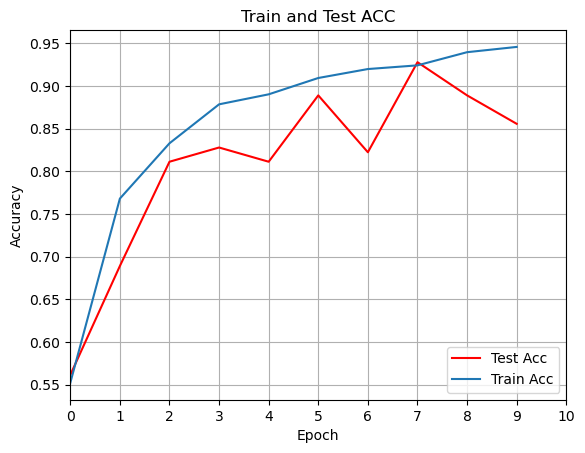

In [21]:
from matplotlib.ticker import MaxNLocator
plt.plot(record['Test Acc'], color='red', label='Test Acc')
plt.plot(record['Train Acc'], label='Train Acc')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('Epoch')
plt.xlim([0, epoch])
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Accuracy')
plt.title('Train and Test ACC')
plt.legend(loc='lower right')
plt.savefig('ACC')
plt.show()

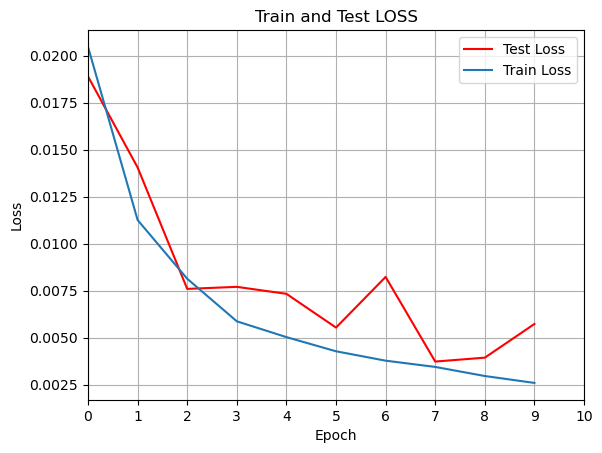

In [22]:
plt.plot(record['Test Loss'], color='red', label='Test Loss')
plt.plot(record['Train Loss'], label='Train Loss')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('Epoch')
plt.xlim([0, epoch])
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Loss')
plt.title('Train and Test LOSS')
plt.legend(loc='upper right')
plt.savefig('LOSS')
plt.show()